In [1]:
import numpy as np
import pandas as pd 

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv(r'C:\Users\USER\Desktop\Credit risk prediction\sample-1.csv')

In [4]:
data = data.drop(columns='Unnamed: 0')

In [5]:
data = data.drop(columns='reCoMmendations')

In [6]:
data.head()

,age_range,gender,marital_status,region,highest_education,school,graduation,study_programme,employment_status,last_year_benefitted,total_loan,loan_purpose,repayment_status,repayment_info_source,repayment_method,repayment_method_convenience,effectiveness_repayment_method,collection_strategy_effectiveness,interaction_quality_on_repayment,alternative_collection_strategies,overall_experience_with_loan_process
0,38 to 48,Male,Married,Southern,Master,Poly,2004.0,Accountancy,Employed_fulltime,2004,"Less than MWK 200,000",Tuition_Living_Stationery,Fully_paid,CRBreport,oneoff,neutral,ineffective,effective,neutral,Contact us via emails with CoMplete informatio...,Dissatisfied
1,28 to 37,Female,Single,Central,Master,Poly,2014.0,Accountancy,Employed_fulltime,2014,"MWK 300,001 – MWK 500,000",Tuition_Living_Stationery,Fully_paid,Employer,monthly_salary,convenient,ineffective,ineffective,neutral,Tracking system and better communication,Dissatisfied
2,28 to 37,Male,Married,Central,Master,Poly,2014.0,Accountancy,Employed_fulltime,2013,"MWK 600,001 – MWK 1,000,000",Tuition_Living,Fully_paid,Email_Phonecall,monthly_salary,very_convenient,very_effective,very_effective,very_positive,Offer rewards for timely payments or early set...,Very satisfied
3,28 to 37,Female,Married,Southern,Master,Poly,2012.0,Accountancy,Employed_fulltime,2011,"MWK 600,001 – MWK 1,000,000",Tuition_Living,Fully_paid,Phonecall_Inperson,monthly_salary,very_convenient,very_effective,very_effective,very_positive,Identify and address potential issues before t...,Very satisfied
4,28 to 37,Male,Married,Central,Bachelor,Poly,2016.0,Accountancy,Employed_fulltime,2015,"MWK 600,001 – MWK 1,000,000",Tuition_Living_Stationery,Fully_paid,Phonecall_Inperson,monthly_salary,very_convenient,very_effective,very_effective,very_positive,Identify and address potential issues before t...,Very satisfied


## feature engineering

In [11]:
print("unique values\n",data.age_range.unique());print()
print("value counts")
print(data.age_range.value_counts())

unique values
 ['38 to 48' '28 to 37' 'Above 49' '21 to 27']

value counts
age_range
28 to 37    176
38 to 48     66
21 to 27     61
Above 49     52
Name: count, dtype: int64


In [11]:
# total loan 
sample.total_loan.unique()

array(['less than mwk 200,000', 'mwk 300,001 – mwk 500,000',
       'mwk 600,001 – mwk 1,000,000', 'above mwk1,000,000',
       'less than mwk 1,000,000', 'k365,000', 'none',
       'mwk 2,000,001 – mwk 3,000,000', 'mwk 1,000,001 – mwk 2,000,000'],
      dtype=object)

In [12]:
sample.total_loan.value_counts()

total_loan
above mwk1,000,000               150
mwk 600,001 – mwk 1,000,000      113
mwk 300,001 – mwk 500,000         56
less than mwk 1,000,000           20
less than mwk 200,000             10
mwk 1,000,001 – mwk 2,000,000      3
k365,000                           1
none                               1
mwk 2,000,001 – mwk 3,000,000      1
Name: count, dtype: int64

In [6]:
data['age_group'] = data['age_range'].replace({'38 to 48': '38 - 48', '28 to 37': '28 - 37', 'Above 49': '49 - 59', '21 to 27': '21 - 27'}).astype('category')

In [7]:
sample = data.applymap(lambda col: col.lower() if isinstance(col, str) else col)

C:\Users\USER\AppData\Local\Temp\ipykernel_20068\1943819626.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sample = data.applymap(lambda col: col.lower() if isinstance(col, str) else col)


In [8]:
sample = sample.drop(columns=['age_range'])

In [13]:
sample.to_csv('sample.csv', index=False)

In [7]:
sex_mstatus = data.groupby(['gender', 'marital_status'])


In [24]:
print("count based on gender and marital status")
pd.DataFrame(sex_mstatus.count())

count based on gender and marital status


age_range  region  highest_education  school  \
gender marital_status                                                 
Female Divorced                8       8                  8       8   
       Married                82      82                 82      82   
       Single                 40      40                 40      40   
       Widowed                 8       8                  8       8   
Male   Divorced                7       7                  7       7   
       Married               114     114                114     114   
       Single                 90      90                 90      90   
       Widowed                 6       6                  6       6   

                       graduation  study_programme  employment_status  \
gender marital_status                                                   
Female Divorced                 8                8                  8   
       Married                 82               82                 82   
       Single                  40               40                 40   
       Widowed                  8                8                  8   
Male   Divorced                 7                7                  7   
       Married                114              114                114   
       Single                  90               90                 90   
       Widowed                  6                6                  6   

                       last_year_benefitted  total_loan  loan_purpose  \
gender marital_status                                                   
Female Divorced                           8           8             8   
       Married                           82          82            82   
       Single                            40          40            40   
       Widowed                            8           8             8   
Male   Divorced                           7           7             7   
       Married                          114         114           114   
       Single                            90          90            90   
       Widowed                            6           6             6   

                       repayment_status  repayment_info_source  \
gender marital_status                                            
Female Divorced                       8                      8   
       Married                       82                     82   
       Single                        40                     40   
       Widowed                        8                      8   
Male   Divorced                       7                      7   
       Married                      114                    114   
       Single                        90                     90   
       Widowed                        6                      6   

                       repayment_method  repayment_method_convenience  \
gender marital_status                                                   
Female Divorced                       8                             8   
       Married                       82                            82   
       Single                        40                            40   
       Widowed                        8                             8   
Male   Divorced                       7                             7   
       Married                      114                           114   
       Single                        90                            90   
       Widowed                        6                             6   

                       effectiveness_repayment_method  \
gender marital_status                                   
Female Divorced                                     8   
       Married                                     82   
       Single                                      40   
       Widowed                                      8   
Male   Divorced                                     7   
       Married                                    114   
  

In [8]:
print('size based on gender and marital status')
sizes = sex_mstatus.size().reset_index().rename(columns={0:'count'})
sizes.columns


size based on gender and marital status


Index(['gender', 'marital_status', 'count'], dtype='object')

In [47]:
sizes

,gender,marital_status,count
0,Female,Divorced,8
1,Female,Married,82
2,Female,Single,40
3,Female,Widowed,8
4,Male,Divorced,7
5,Male,Married,114
6,Male,Single,90
7,Male,Widowed,6


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='gender', ylabel='Count'>

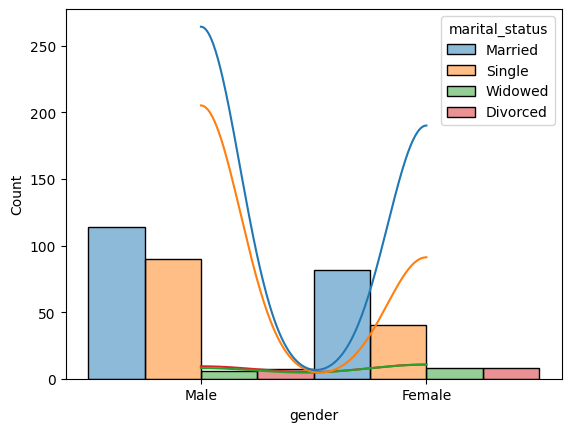

In [ ]:
sns.histplot(data, x='gender', hue='marital_status', multiple='dodge', kde='line')

In [10]:
sex_mstatus_grp2 = data.groupby(['gender', 'marital_status', 'repayment_status'])

In [39]:
sex_mstaus_repayment = sex_mstatus_grp2.size().reset_index()
sex_mstaus_repayment = sex_mstaus_repayment.rename(columns={0: 'count'})
sex_mstaus_repayment.columns

Index(['gender', 'marital_status', 'repayment_status', 'count'], dtype='object')

In [58]:
sex_mstaus_repayment.sort_values(by='count', ascending=False)

,gender,marital_status,repayment_status,count
13,Male,Married,Fully_paid,66
18,Male,Single,not_paid,51
3,Female,Married,Fully_paid,47
17,Male,Single,Partially_paid,27
14,Male,Married,Partially_paid,25
15,Male,Married,not_paid,23
5,Female,Married,not_paid,19
8,Female,Single,not_paid,18
4,Female,Married,Partially_paid,16
16,Male,Single,Fully_paid,12


In [63]:
data.sample(1)

,age_range,gender,marital_status,region,highest_education,school,graduation,study_programme,employment_status,last_year_benefitted,total_loan,loan_purpose,repayment_status,repayment_info_source,repayment_method,repayment_method_convenience,effectiveness_repayment_method,collection_strategy_effectiveness,interaction_quality_on_repayment,alternative_collection_strategies,overall_experience_with_loan_process,age_group
186,28 to 37,Male,Single,northern,Bachelor,Chanco,2014.0,Education_Science,Employed_parttime,2013,"Above MWK1,000,000",Tuition_Living,not_paid,Inperson,none,inconvenient,ineffective,neutral,neutral,Clear communication,neutral,28 - 37


In [11]:
education = data.groupby(['highest_education', 'school', 'study_programme'])

In [12]:
_education = education.size().reset_index().rename(columns={0:'count'}).sort_values(by='count', ascending=False)

In [78]:
_education.school.nunique()

11

In [79]:
_education.study_programme.nunique()

61

In [82]:
_education.sample(4)

,highest_education,school,study_programme,count
52,Bachelor,Poly,Architectural_Studies_,2
44,Bachelor,Mzuni,Pharmacy,7
74,Doctorate,CoM,MBBS,2
5,Bachelor,Chanco,Performing_Arts,1


In [13]:
def distributionTables(data):
    for col in _education.columns:
        counts = data[col].value_counts()
        percent = (data[col].value_counts(normalize=True)*100).round(2)
        
        table = pd.DataFrame({
            'response': counts.index,
            'count': counts.values,
            'percent(%)': percent.values       
        })
        
        print(f'{col}')
        print(table);print()

In [14]:
distributionTables(_education)

highest_education
    response  count  percent(%)
0   Bachelor     66       53.66
1     Master     34       27.64
2  Doctorate     22       17.89
3    Diploma      1        0.81

school
   response  count  percent(%)
0     Mzuni     38       30.89
1      Poly     26       21.14
2    Chanco     17       13.82
3    Luanar     16       13.01
4       CoM      6        4.88
5   Chanco       6        4.88
6      CoM       6        4.88
7      MUST      4        3.25
8   Luanar       2        1.63
9       KCN      1        0.81
10  MANCOSA      1        0.81

study_programme
                                          response  count  percent(%)
0                                Education_Science     15       12.20
1                                             MBBS     10        8.13
2                                         Pharmacy      7        5.69
3                                        Dentistry      6        4.88
4                   Theology_and_Religious_Studies      6        4.88
5    

In [15]:
highest_level = data.groupby(['highest_education', 'repayment_status'])

In [16]:
_level = highest_level.size().reset_index().rename(columns={0:'count'}).sort_values(by='count', ascending=False)

In [20]:
_level = _level.drop(columns='percent')
_level

,highest_education,repayment_status,count
2,Bachelor,not_paid,98
0,Bachelor,Fully_paid,68
1,Bachelor,Partially_paid,67
6,Master,Fully_paid,50
4,Doctorate,Fully_paid,37
8,Master,not_paid,15
7,Master,Partially_paid,14
5,Doctorate,Partially_paid,5
3,Diploma,Fully_paid,1


In [18]:
sample.total_loan.value_counts() 

total_loan
above mwk1,000,000               150
mwk 600,001 – mwk 1,000,000      113
mwk 300,001 – mwk 500,000         56
less than mwk 1,000,000           20
less than mwk 200,000             10
mwk 1,000,001 – mwk 2,000,000      3
k365,000                           1
none                               1
mwk 2,000,001 – mwk 3,000,000      1
Name: count, dtype: int64

In [19]:
sample.total_loan.unique()

array(['less than mwk 200,000', 'mwk 300,001 – mwk 500,000',
       'mwk 600,001 – mwk 1,000,000', 'above mwk1,000,000',
       'less than mwk 1,000,000', 'k365,000', 'none',
       'mwk 2,000,001 – mwk 3,000,000', 'mwk 1,000,001 – mwk 2,000,000'],
      dtype=object)

In [10]:
sample['over_under_milion'] = sample.total_loan

In [11]:
sample['over_under_milion'] = sample['over_under_milion'].replace({'above mwk1,000,000': 'over', 'mwk 600,001 – mwk 1,000,000': 'under', 'mwk 300,001 – mwk 500,000':'under',
                                     'less than mwk 1,000,000':'under', 'less than mwk 200,000':'under', 'mwk 1,000,001 – mwk 2,000,000': 'over',
                                     'k365,000': 'under', 'mwk 2,000,001 – mwk 3,000,000': 'over'})

In [12]:
sample.over_under_milion.value_counts()

over_under_milion
under    200
over     154
none       1
Name: count, dtype: int64

In [13]:
 sample['over_under_milion'].str.contains('none').value_counts()

over_under_milion
False    354
True       1
Name: count, dtype: int64

In [13]:
# sample.drop(sample[sample['over_under_milion'] == 'none'], axis=0)
# sample.drop(sample['over_under_milion'].str.contains('none'))
substring_mask = sample['over_under_milion'].str.contains('none')
indices_to_drop = sample[substring_mask].index
sample = sample.drop(indices_to_drop)

In [100]:
sample.sample(1)

,gender,marital_status,region,highest_education,school,graduation,study_programme,employment_status,last_year_benefitted,total_loan,loan_purpose,repayment_status,repayment_info_source,repayment_method,repayment_method_convenience,effectiveness_repayment_method,collection_strategy_effectiveness,interaction_quality_on_repayment,alternative_collection_strategies,overall_experience_with_loan_process,age_group,over_under_milion
124,male,married,northern,bachelor,mzuni,2015.0,chemistry,employed_fulltime,2014,"mwk 600,001 – mwk 1,000,000",tuition_living,fully_paid,email_phonecall_inperson,monthly_salary,very_convenient,very_effective,very_effective,very_positive,conduct regular audits,very satisfied,38 - 48,under


In [14]:
sample = sample.drop(columns='total_loan')

In [15]:
sample.to_csv('sample.csv', index=False)

In [16]:
sample['discipline'] = sample.study_programme

In [17]:
sample.loc[sample['discipline'].str.contains('technology'), 'discipline'] = 'technology'
sample.loc[sample['discipline'].str.contains('edu'), 'discipline'] = 'education'
sample.loc[sample['discipline'].str.contains('soci'), 'discipline'] = 'social science'
sample.loc[sample['discipline'].str.contains('theology'), 'discipline'] = 'theology'
sample.loc[sample['discipline'].str.contains('mbbs|pharmacy|dentistry|food|biomedical|nursing|animal|optometry|vert', case=False), 'discipline'] = 'medicine'
sample.loc[sample['discipline'].str.contains('accountancy|agribusiness_management|agricultural_economics|business_administration|business_studies|commerce|human_resource_development_|sports_management|tourism', case=False), 'discipline'] = 'commerce'
sample.loc[sample['discipline'].str.contains('arts_humanities|cultural_studies|humanities|theology'), 'discipline'] = 'humanities'
sample.loc[sample['discipline'].str.contains('soci|bachelor_of_arts_political_science|education|journalism|law|library_and_information_science_|media_for_development|social science', case=False), 'discipline'] = 'social sciences'
sample.loc[sample['discipline'].str.contains('agronomy|architectural_studies_|chemistry|civil_engineering|data_science|electrical_engineering|electronics_and_telecommunications_engineering|engineering_|irrigation_engineering|mechanical_engineering|renewable_energy_technologies|science|technology', case=False), 'discipline'] = 'stem'
sample.loc[sample['discipline'].str.contains('environmental_management|environmental_management_|fisheries|fisheries_and_aquatic_sciences|forestry|natural_resources_management|physical_planning|veterinary_medicine|water_resources_management|environmental_health', case=False), 'discipline'] = 'natural resourses'
sample.loc[sample['discipline'].str.contains('medicine|veterinary_medicine|environmental_health', case=False), 'discipline'] = 'health sciences'
sample.loc[sample['discipline'].str.contains('textile_and_fashion_design'), 'discipline'] = 'design'

In [27]:
sample.discipline.value_counts()

discipline
stem                 176
health sciences      104
commerce              30
humanities            28
natural resourses     14
design                 1
performing_arts        1
Name: count, dtype: int64

In [30]:
sample.discipline.nunique()

7

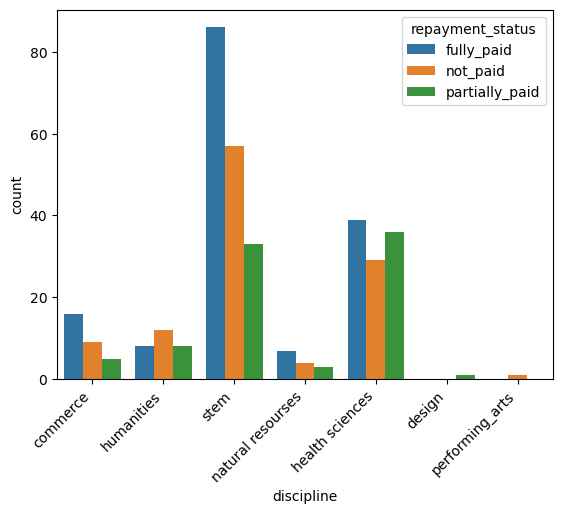

In [41]:
sns.countplot(data=sample, x='discipline', hue='repayment_status')
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
sample_2 = sample.copy()

In [19]:
sample_2.sample(4)

,gender,marital_status,region,highest_education,school,graduation,study_programme,employment_status,last_year_benefitted,loan_purpose,repayment_status,repayment_info_source,repayment_method,repayment_method_convenience,effectiveness_repayment_method,collection_strategy_effectiveness,interaction_quality_on_repayment,alternative_collection_strategies,overall_experience_with_loan_process,over_under_milion,discipline
353,male,married,central,master,chanco,2002.0,education_science,self_employed,2001,tuition_stationery,fully_paid,email,oneoff,convenient,effective,neutral,positive,automate the system,satisfied,under,stem
133,female,married,northern,bachelor,mzuni,2012.0,nursing_and_midwifery,employed_fulltime,2011,tuition_living,fully_paid,inperson,voluntary_monthly,convenient,effective,effective,positive,automate the system,satisfied,under,health sciences
315,male,single,central,bachelor,mzuni,2011.0,mbbs,employed_fulltime,2010,tuition_living,not_paid,inperson,none,inconvenient,ineffective,neutral,neutral,accountability_reporting,neutral,over,health sciences
88,male,divorced,central,master,luanar,2015.0,agronomy,employed_fulltime,2014,living,fully_paid,inperson,monthly_salary,convenient,effective,effective,positive,provide multi- language support,neutral,under,stem


In [20]:
cols_drop = ['alternative_collection_strategies', 'study_programme']
sample =  sample.drop(columns=cols_drop)

In [48]:
sample.shape

(354, 20)

In [21]:
print("grad year: ");print(sample.graduation.nunique())
print("last year benefitted: ");print(sample.last_year_benefitted.nunique())

grad year: 
24
last year benefitted: 
28


In [22]:
sample.columns

Index(['gender', 'marital_status', 'region', 'highest_education', 'school',
       'graduation', 'employment_status', 'last_year_benefitted',
       'loan_purpose', 'repayment_status', 'repayment_info_source',
       'repayment_method', 'repayment_method_convenience',
       'effectiveness_repayment_method', 'collection_strategy_effectiveness',
       'interaction_quality_on_repayment',
       'overall_experience_with_loan_process', 'over_under_milion',
       'discipline'],
      dtype='object')

In [81]:
sample.effectiveness_repayment_method.value_counts()

effectiveness_repayment_method
ineffective         122
effective           106
very_effective       75
neutral              48
very ineffective      3
Name: count, dtype: int64

In [84]:
sample.collection_strategy_effectiveness.value_counts()

collection_strategy_effectiveness
neutral             151
effective           112
very_effective       71
ineffective          18
very ineffective      2
Name: count, dtype: int64

In [87]:
sample.interaction_quality_on_repayment.value_counts()

interaction_quality_on_repayment
neutral          164
positive         100
very_positive     75
negative          15
Name: count, dtype: int64

In [91]:
sample.overall_experience_with_loan_process.value_counts()

overall_experience_with_loan_process
neutral              169
satisfied             88
very satisfied        75
dissatisfied          20
very dissatisfied      2
Name: count, dtype: int64

In [70]:
repayment_ = sample.groupby(['repayment_method_convenience', 'repayment_method', 'repayment_status'])
repayment_table = repayment_.size().reset_index().rename(columns={0:'count'}).sort_values(by='count', ascending=False)
repayment_table['pct'] = (repayment_table['count'] / repayment_table['count'].sum()) * 100

In [73]:
repayment_table.sample(5)

,repayment_method_convenience,repayment_method,repayment_status,count,pct
9,inconvenient,none,not_paid,87,24.576271
7,inconvenient,monthly_salary,fully_paid,1,0.282486
21,very_convenient,none,not_paid,1,0.282486
2,convenient,monthly_salary,partially_paid,26,7.344633
1,convenient,monthly_salary,not_paid,2,0.564972


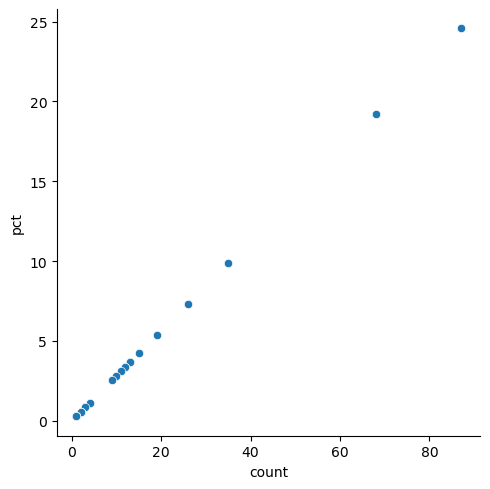

In [72]:
sns.relplot(data=repayment_table, x='count', y='pct')

In [59]:
sample.repayment_method_convenience.value_counts()

repayment_method_convenience
inconvenient         112
convenient            91
very_convenient       76
neutral               73
very_inconvenient      2
Name: count, dtype: int64

In [54]:
sample.repayment_method.value_counts()

repayment_method
monthly_salary       182
none                 108
voluntary_monthly     46
oneoff                18
Name: count, dtype: int64

In [36]:
sample['school'] = sample['school'].replace({'com ':'com', 'chanco ':'chanco'})


In [42]:
sample['employment_status'] = sample['employment_status'].replace({'employed_fulltime':'fulltime', 'employed_parttime':'parttime'})

In [50]:
sample.loan_purpose.value_counts()

loan_purpose
tuition_living               231
tuition_living_stationery     35
tuition                       34
living                        34
tuition_stationery            10
living_stationery              6
stationery                     4
Name: count, dtype: int64

In [78]:
sample.repayment_info_source.nunique()

10

In [ ]:
crbreport, employer, email_phonecall, phonecall_inperson, inperson, email_phonecall_inperson, email,
email_inperson, none, phonecall, inperson_employer, email_inperson_employer, 
phonecall_inperson_employer, letter, media, sms, email_sms, posters, phonecall_employer, socialmedia

In [77]:
sample.loc[sample['repayment_info_source'].str.contains('email_phonecall|phonecall_inperson| email_phonecall_inperson|phonecall|phonecall_inperson_employer|sms', case=False), 'repayment_info_source'] = 'phone'
sample.loc[sample['repayment_info_source'].str.contains('employer', case=False), 'repayment_info_source'] = 'employer'
sample.loc[sample['repayment_info_source'].str.contains('media', case=False), 'repayment_info_source'] = 'socialmedia'

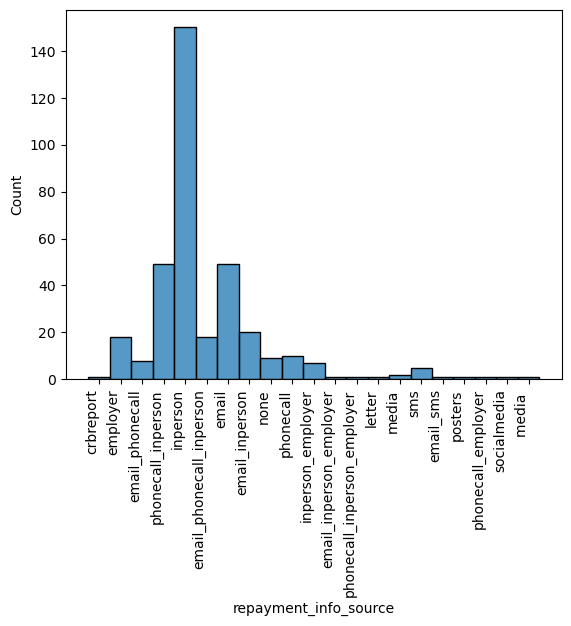

In [51]:
sns.histplot(data=sample, x='repayment_info_source')
plt.xticks(rotation=90, ha='right')
plt.show()

In [ ]:
sample.to_csv('')